In [10]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv
import os
load_dotenv()

True

In [2]:
llm = ChatGoogleGenerativeAI(model='gemini-1.5-flash', temperature=0.1)

In [11]:
class ChatState(TypedDict):
  question: str
  answer: str

In [12]:
def chat_llm(state:ChatState) -> ChatState:
  question = state["question"]

  prompt = f"Answer the following question: {question}"
  response = llm.invoke(prompt)
  response  =  response.content
  state["answer"] = response
  return state
    

In [13]:
graph = StateGraph(ChatState)
graph.add_node("chat_llm", chat_llm)
graph.add_edge(START, "chat_llm")
graph.add_edge("chat_llm", END)
app = graph.compile()

In [14]:
intial_state = {'question': 'How far is moon from the earth?'}

final_state = app.invoke(intial_state)

print(final_state['answer'])

The distance between the Earth and the Moon is not constant because the Moon's orbit is elliptical.  However, the average distance is approximately **238,855 miles (384,400 kilometers)**.


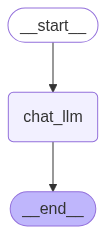

In [16]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
llm.invoke('How far is moon from the earth?').content

"The distance between the Earth and the Moon is not constant because the Moon's orbit is elliptical.  The average distance is about **238,855 miles (384,400 kilometers)**."